In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler

In [66]:
df = pd.read_csv('har_train.csv')
df.head()

,classe,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,A,1.41,8.07,-94.4,3,0.00,0.0,-0.02,-21,4,...,36,0.03,0.00,-0.02,192,203,-215,-17,654,476
1,A,1.41,8.07,-94.4,3,0.02,0.0,-0.02,-22,4,...,36,0.02,0.00,-0.02,192,203,-216,-18,661,473
2,A,1.42,8.07,-94.4,3,0.00,0.0,-0.02,-20,5,...,36,0.03,-0.02,0.00,196,204,-213,-18,658,469
3,A,1.48,8.05,-94.4,3,0.02,0.0,-0.03,-22,3,...,36,0.02,-0.02,0.00,189,206,-214,-16,658,469
4,A,1.45,8.06,-94.4,3,0.02,0.0,-0.02,-21,4,...,36,0.02,-0.02,-0.03,193,203,-215,-9,660,478


In [67]:
#Mean
mean = np.mean(df['accel_forearm_y'].values)
mean

163.43808691854116

In [68]:
#Medain
median = np.median(df['accel_forearm_y'].values)
median

200.0

In [69]:
len(df['accel_forearm_y'].values)

13737

In [70]:
#Median without direct function
sorterd_array = np.sort(df['accel_forearm_y'].values)
sorterd_array[6869]#middle value

200

In [71]:
#Quantiles
q1 = np.quantile(df['accel_forearm_y'].values, 0.25)
q3 = np.quantile(df['accel_forearm_y'].values, 0.75)

In [72]:
#Outliers using IQR method
lower_outliers = np.argwhere(df['accel_forearm_y'].values < (q1 - 1.5*(q3-q1)))
higher_outliers = np.argwhere(df['accel_forearm_y'].values > (q3 + 1.5*(q3-q1)))
outliers = []
for i in range(lower_outliers.size):
    outliers.append(df['accel_forearm_y'].values[lower_outliers[i][0]])
for i in range(higher_outliers.size):
    outliers.append(df['accel_forearm_y'].values[higher_outliers[i][0]])
print(f'total number of outliers: {len(outliers)}')
print(f'outliers: {outliers}')

total number of outliers: 206
outliers: [-405, -462, -401, -380, -393, -390, -444, -420, -361, -352, -343, -389, -365, -383, -356, -349, -342, -366, -352, -396, -335, -337, -368, -406, -335, -423, -435, -438, -393, -390, -393, -372, -341, -435, -405, -380, -355, -347, -363, -360, -358, -344, -344, -365, -378, -382, -411, -415, -410, -370, -351, -356, -381, -400, -377, -371, -349, -343, -401, -356, -346, -347, -337, -349, -356, -376, -389, -350, -343, -417, -388, -378, -372, -373, -368, -365, -342, -337, -433, -406, -397, -414, -415, -409, -402, -393, -362, -389, -413, -409, -366, -424, -401, -361, -406, -384, -393, -404, -397, -388, -382, -375, -353, -340, -336, -366, -401, -395, -385, -384, -392, -395, -390, -373, -373, -373, -360, -341, -335, -335, -338, -351, -392, -389, -358, -341, -352, -351, -351, -340, -373, -351, -408, -366, -406, -585, -390, -336, -343, -379, -382, -392, -380, -351, -393, -372, -337, -361, -383, -379, -374, -336, -336, -352, -380, -376, -364, -358, -356, -350,

/Users/surya.t/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


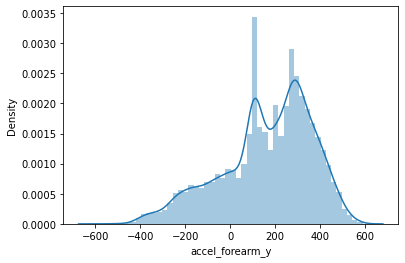

In [73]:
sns.distplot(df['accel_forearm_y'])
plt.show()

/Users/surya.t/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='accel_forearm_y'>

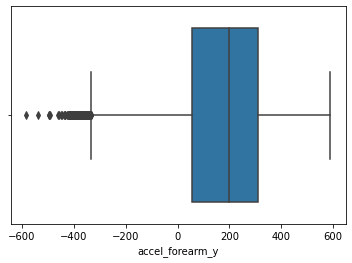

In [74]:
sns.boxplot(df['accel_forearm_y'])

In [75]:
#Standard deviation
std = np.std(df['accel_forearm_y'].values)
std

200.70738510679445

In [76]:
#Variance
var = np.var(df['accel_forearm_y'].values)
var

40283.45443640709

In [77]:
#Skewness:
skew(df['accel_forearm_y'])
#moderately skewed

-0.6363014734660284

In [78]:
#Kurtosis
kurtosis(df['accel_forearm_y'])

-0.1478691681780302

In [79]:
#Outliers using z-score method
z_outliers = []
for i in range(df['accel_forearm_y'].values.size):
    z_score = (df['accel_forearm_y'].values[i] - mean)/std
    if z_score < -3 or z_score > 3:
        z_outliers.append(df['accel_forearm_y'].values[i])

In [130]:
z_outliers

[-462, -444, -585, -496, -496, -491, -537, -448, -456]

In [131]:
#Applying standardscaler
sc = StandardScaler()
accel_forearm_y_fit = sc.fit_transform(df['accel_forearm_y'].values.reshape(-1, 1))

/Users/surya.t/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


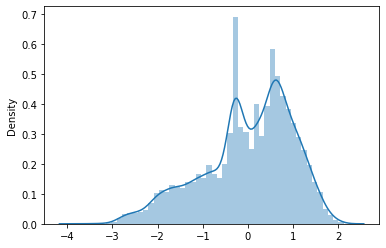

In [132]:
sns.distplot(accel_forearm_y_fit)
plt.show()

In [134]:
np.mean(accel_forearm_y_fit)
#After applying standardscaler mean becomes close to 0.

3.724181187648483e-17

In [135]:
#Central limit theorem
#Randomly selecting 30 samples and finding mean and saving it in a list
random_values_mean = []
for i in range(len(df['accel_forearm_y'].values)):
    random_values_mean.append(np.mean(df['accel_forearm_y'].sample(30).values))

/Users/surya.t/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


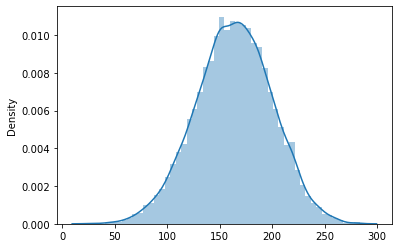

In [136]:
#Distribution plot of sample means which is now normal distribution
random_values_mean = np.array(random_values_mean)
sns.distplot(random_values_mean)
plt.show()

In [137]:
#Mean and SD of the sample means
print(np.mean(random_values_mean))
print(np.std(random_values_mean))

163.47313581325375
36.36049085305024
